In [1]:
#Impor Library yang akan digunakan (Tensorflow,)
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import History 

Using TensorFlow backend.


In [0]:
#Ambil Dataset MNIST, pecah menjadi data training dan data test. Variabel x berisi kode RGB, variabel y berisi jawaban / angka yang benar
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

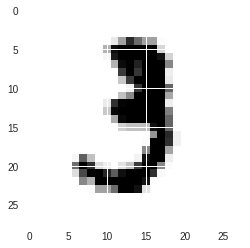

In [3]:
#Tampilkan salah satu untuk menguji apakah data telah diunduh dengan benar, contoh disini akan mencetak data di index ke-10
%matplotlib inline
plt.imshow(x_train[10], cmap='Greys')

In [4]:
#Data yang diunduh berjumlah 60000 untuk train, dengan masing - masing gambar berukuran 28 x 28 pixel
x_train.shape

(60000, 28, 28)

In [0]:
#Normalisasi input agar data dapat diolah Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#Typecast ke desimal untuk memastikan hasil pembagian juga desimal
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# RGB dibagi dengan nilai maksimum RGB
x_train /= 255
x_test /= 255

In [6]:
#Skema Arsitektur CNN (2D Convolution Layer)
#Model sekuensial
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = History()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
train_result = model.fit(x=x_train,y=y_train, epochs=10,callbacks=[history])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.1960 - acc: 0.9416
Epoch 2/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.0775 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.0548 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.0438 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 46s 765us/step - loss: 0.0336 - acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 47s 776us/step - loss: 0.0296 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 48s 798us/step - loss: 0.0247 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0220 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 46s 773us/step - loss: 0.0198 - acc: 0.9932
Epoch 10/10
60000/60000 [=========

In [10]:
print(train_result.history['loss'])

[0.1960166320408384, 0.07745663879575829, 0.05480073008060766, 0.04375499588744715, 0.03355778095580172, 0.02959046536992634, 0.024698698502800348, 0.022032757410335276, 0.01981970316116834, 0.017463156816092548]


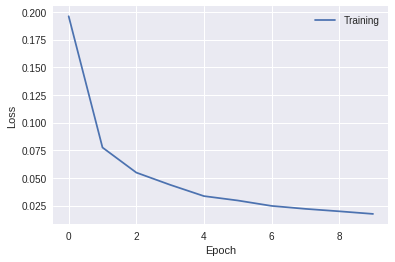

In [11]:
plt.plot(train_result.history['loss'],label='Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

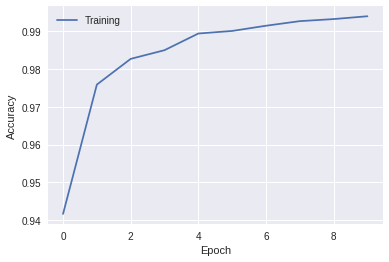

In [12]:
plt.plot(train_result.history['acc'],label='Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 228us/step


[0.06420812038613112, 0.9843]